In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm import tqdm

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
data = []
labels = []
data_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"

for class_id in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_id)
    if not os.path.isdir(class_path):
        continue
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(int(class_id))

data = np.array(data)
labels = np.array(labels)

# Normalleştirme ve etiketleri one-hot encode etme
data = data / 255.0
labels = to_categorical(labels, num_classes=43)

# Eğitim ve test kümeleri oluştur
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(43, activation='softmax')  # 43 sınıf var
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Yapıyı gör
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modeli eğit
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=64,
    verbose=1
)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.2791 - loss: 2.7096 - val_accuracy: 0.8563 - val_loss: 0.6023
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.7590 - loss: 0.7946 - val_accuracy: 0.9444 - val_loss: 0.2358
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.8596 - loss: 0.4606 - val_accuracy: 0.9648 - val_loss: 0.1511
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.8922 - loss: 0.3462 - val_accuracy: 0.9774 - val_loss: 0.1054
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9225 - loss: 0.2539 - val_accuracy: 0.9806 - val_loss: 0.0869
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.9333 - loss: 0.2149 - val_accuracy: 0.9828 - val_loss: 0.0681
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.9446 - loss: 0.1822 - val_accuracy: 0.9851 - val_loss: 0.0625
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.9525 - loss: 0.1553 - 

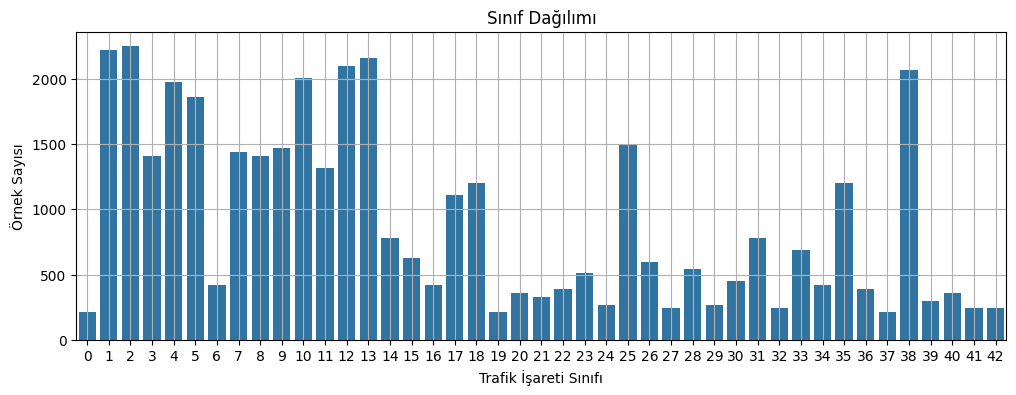

In [ ]:
import seaborn as sns
import pandas as pd

# Etiketleri yeniden alalım
label_counts = pd.Series(np.argmax(labels, axis=1)).value_counts().sort_index()

plt.figure(figsize=(12, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Sınıf Dağılımı")
plt.xlabel("Trafik İşareti Sınıfı")
plt.ylabel("Örnek Sayısı")
plt.grid(True)
plt.show()


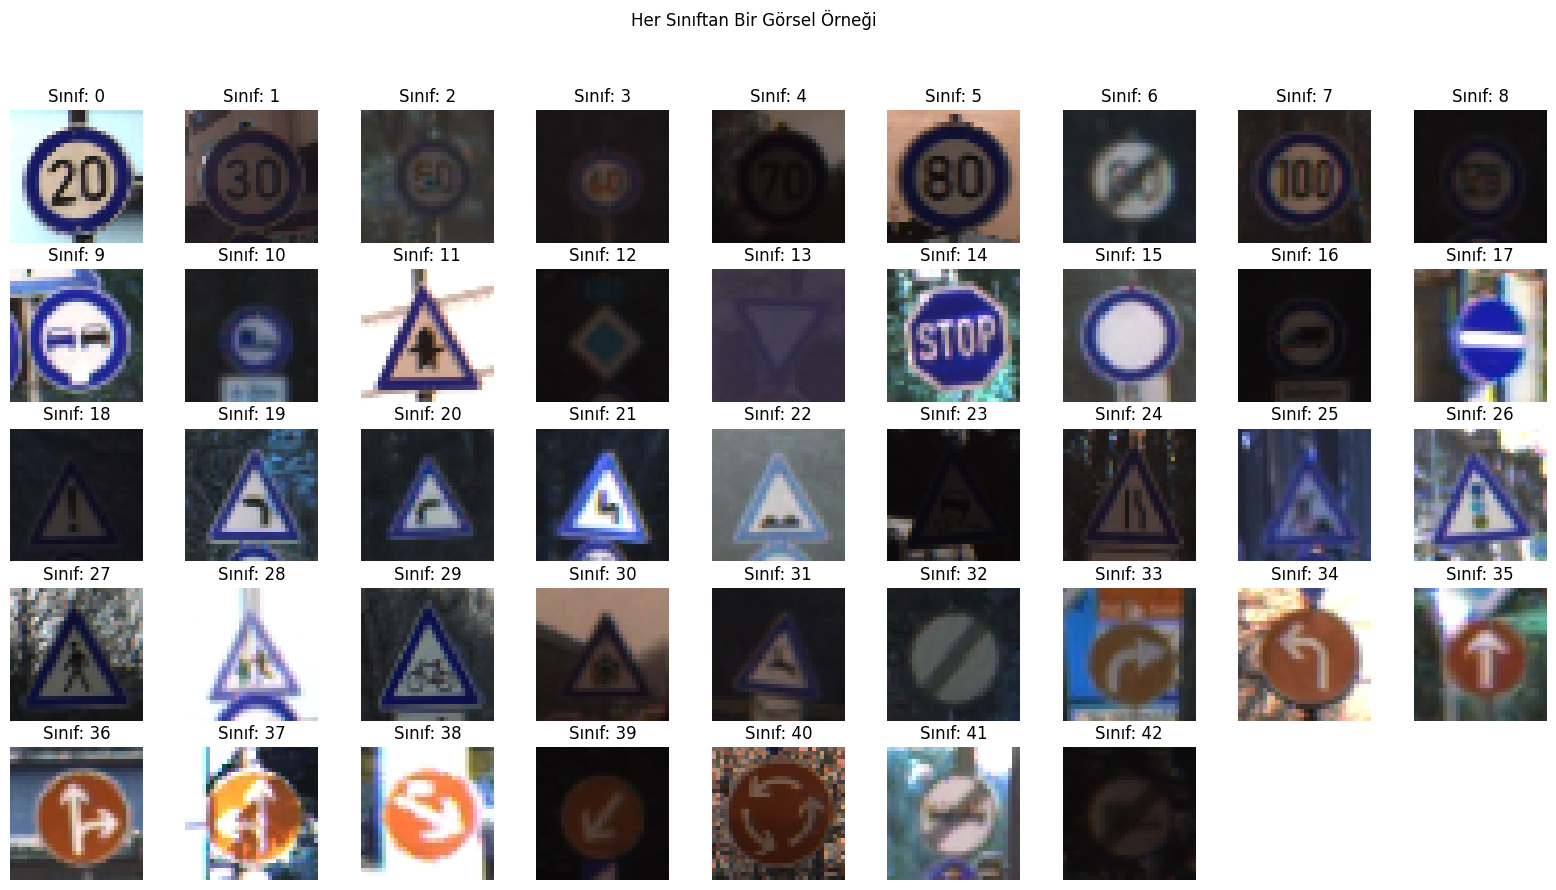

In [ ]:
# Her sınıftan örnek görsel gösterelim
plt.figure(figsize=(20, 10))
for i in range(43):
    idx = np.where(np.argmax(labels, axis=1) == i)[0][0]
    plt.subplot(5, 9, i + 1)
    plt.imshow(data[idx])
    plt.title(f"Sınıf: {i}")
    plt.axis('off')
plt.suptitle("Her Sınıftan Bir Görsel Örneği")
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


<Figure size 1200x1200 with 0 Axes>

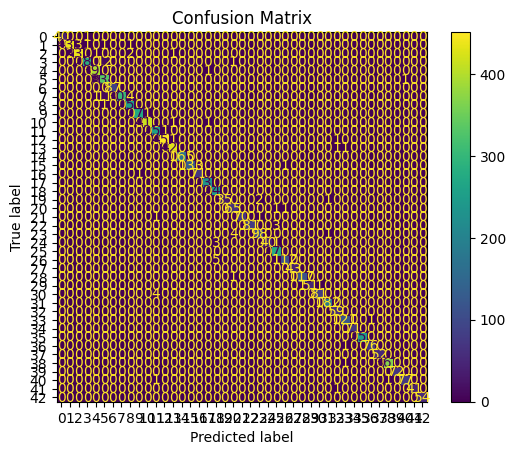

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))  # Boyutu burada ayarla

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()  # figsize parametresi yok
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


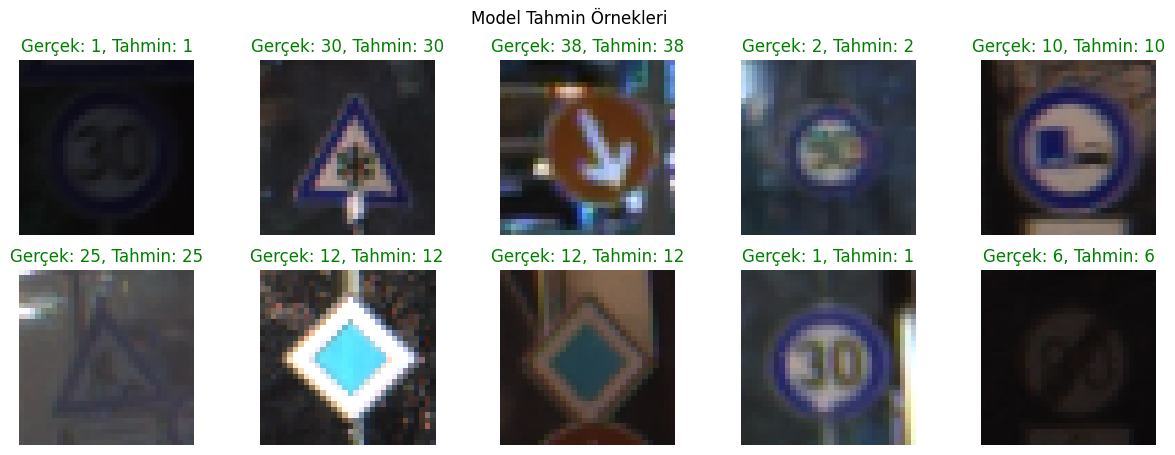

In [ ]:
# 10 tahmin örneğini görsel + sonuç ile göster
plt.figure(figsize=(15, 5))
for i in range(10):
    idx = np.random.randint(len(X_test))
    img = X_test[idx]
    true = np.argmax(y_test[idx])
    pred = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Gerçek: {true}, Tahmin: {pred}", color='green' if true == pred else 'red')
    plt.axis('off')
plt.suptitle("Model Tahmin Örnekleri")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


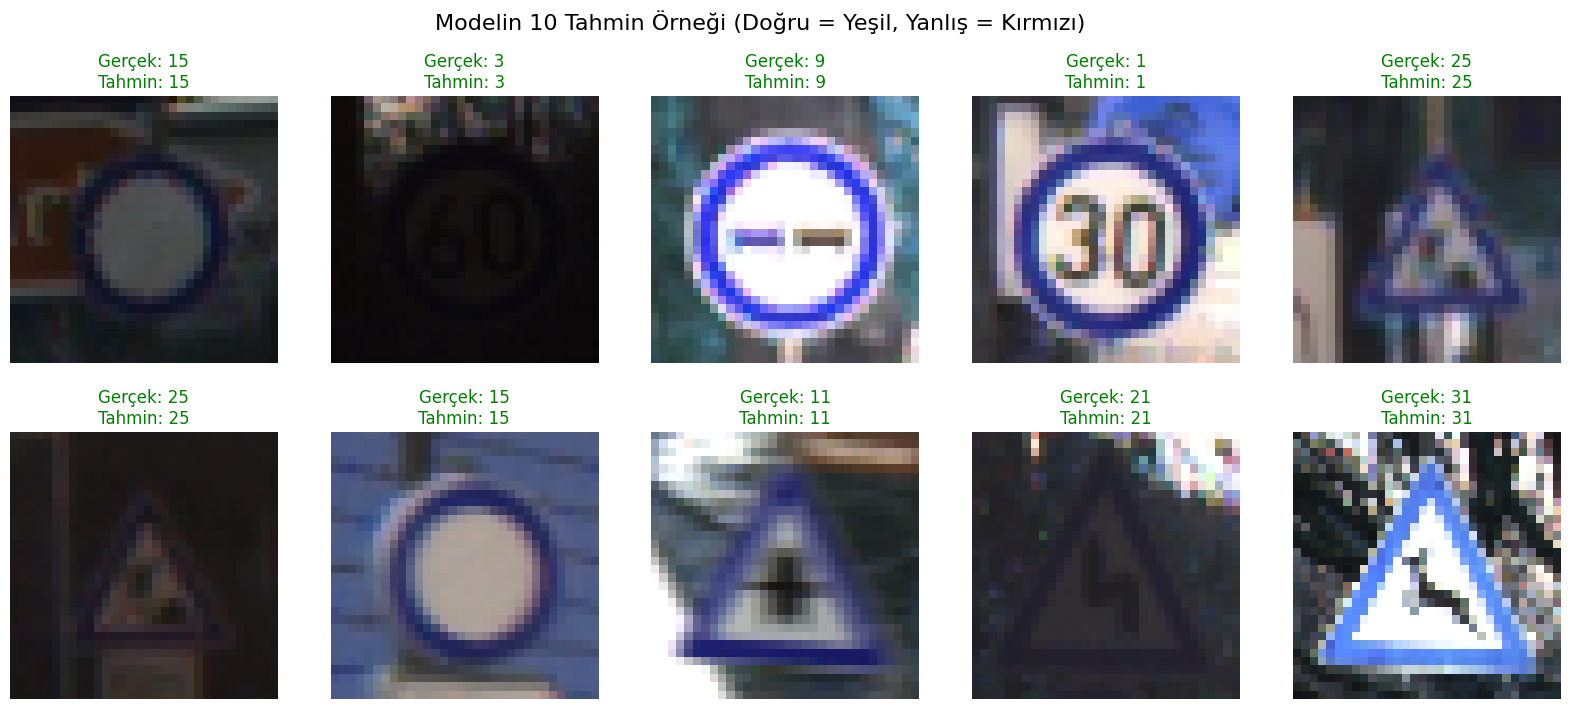

In [ ]:
import random

plt.figure(figsize=(20, 8))

for i in range(10):
    index = random.randint(0, len(X_test) - 1)
    img = X_test[index]
    true = np.argmax(y_test[index])
    pred = np.argmax(model.predict(img[np.newaxis, ...]))

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    color = 'green' if true == pred else 'red'
    plt.title(f"Gerçek: {true}\nTahmin: {pred}", color=color)
    plt.axis('off')

plt.suptitle("Modelin 10 Tahmin Örneği (Doğru = Yeşil, Yanlış = Kırmızı)", fontsize=16)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, digits=3))


              precision    recall  f1-score   support

           0      1.000     0.976     0.988        41
           1      0.995     0.986     0.991       444
           2      0.993     0.986     0.990       444
           3      0.993     0.956     0.974       295
           4      0.988     0.997     0.992       396
           5      0.930     0.988     0.958       338
           6      1.000     1.000     1.000        87
           7      1.000     0.951     0.975       324
           8      0.974     0.996     0.985       260
           9      0.996     0.996     0.996       274
          10      0.998     0.995     0.996       417
          11      0.977     0.996     0.987       258
          12      0.998     0.996     0.997       453
          13      0.993     0.995     0.994       431
          14      1.000     1.000     1.000       165
          15      1.000     0.993     0.996       134
          16      1.000     0.986     0.993        72
          17      0.991    

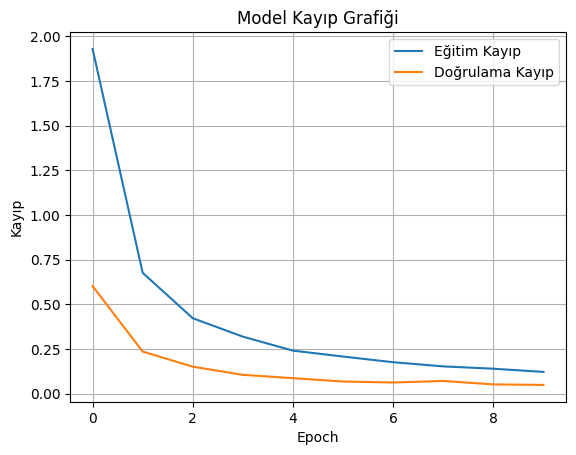

In [ ]:
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.title('Model Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# y_true ve y_pred sınıf indekslerine dönüştürülüyor
y_true_cnn = np.argmax(y_test, axis=1)
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)

acc_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
print(f"✅ CNN Modeli Genel Doğruluğu: %{acc_cnn * 100:.2f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
✅ CNN Modeli Genel Doğruluğu: %98.78
